# KDAG TASK-2
## Finding distance b/w Urban Centres using Clustering Algorithm
### *Analysing the Data*
*Note:To calculate optimal number of clusters we ahve used two methods elbow method and silhouette score method*<br>
<br>
Below code plots the provided satellite image in a coordiante plane,then it is converted to a gray scale image and then it is converted to numpy array with value of intensities of pixel as entries.


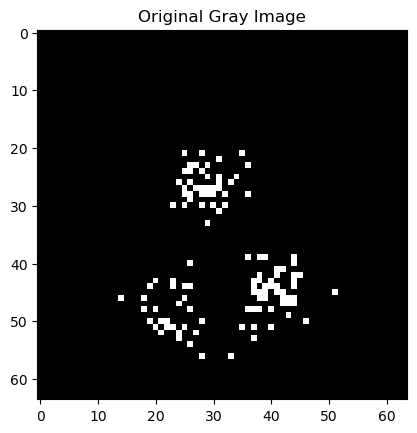

In [35]:
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
#path of image to be traced

#in python backslash is used to escape special characters cab be resolved by using raw strings by using r literal

image_path = r'images\2.png'
#opening image through pillow and converting through grey chanel not RGB

img = Image.open(image_path).convert('L')
 #converting PIl image to numpy array
 #convert to rgb format


gray_array= np.array(img)

#plt.imshow(image)
plt.imshow(gray_array, cmap='gray')
plt.title("Original Gray Image")
plt.show()




Calculating the dimension of the array hence checking for number of pixels in the image

In [36]:
height,width=gray_array.shape
print(gray_array.shape)



(64, 64)


 For simplicity we have considered the visibly white points with intensities ranging from **200 to 255**.<br>
 These points are then stored in array white, for the same following steps are followed:<br>
 i. The indices of *gray_array* are stored as x coordinates and y coordinates.<br>
 ii.Since top most point will have y coordinate of 64 instead of 0 y-axis inversion is done by subtracting orginal indice from height of image.

[[25 43]
 [28 43]
 [35 43]
 [31 42]
 [26 41]
 [27 41]
 [29 41]
 [36 41]
 [25 40]
 [26 40]
 [28 40]
 [29 39]
 [31 39]
 [34 39]
 [24 38]
 [26 38]
 [31 38]
 [33 38]
 [25 37]
 [27 37]
 [28 37]
 [29 37]
 [30 37]
 [31 37]
 [25 36]
 [26 36]
 [28 36]
 [29 36]
 [30 36]
 [32 36]
 [36 36]
 [26 35]
 [23 34]
 [25 34]
 [28 34]
 [30 34]
 [32 34]
 [31 33]
 [29 31]
 [36 25]
 [38 25]
 [39 25]
 [44 25]
 [26 24]
 [44 24]
 [41 23]
 [42 23]
 [38 22]
 [41 22]
 [44 22]
 [45 22]
 [20 21]
 [23 21]
 [37 21]
 [38 21]
 [40 21]
 [44 21]
 [19 20]
 [23 20]
 [25 20]
 [26 20]
 [37 20]
 [39 20]
 [40 20]
 [41 20]
 [44 20]
 [37 19]
 [38 19]
 [39 19]
 [41 19]
 [42 19]
 [51 19]
 [14 18]
 [18 18]
 [25 18]
 [38 18]
 [39 18]
 [42 18]
 [43 18]
 [44 18]
 [24 17]
 [42 17]
 [43 17]
 [44 17]
 [18 16]
 [20 16]
 [26 16]
 [36 16]
 [37 16]
 [38 16]
 [40 16]
 [43 15]
 [19 14]
 [21 14]
 [22 14]
 [28 14]
 [46 14]
 [20 13]
 [22 13]
 [23 13]
 [25 13]
 [35 13]
 [37 13]
 [40 13]
 [21 12]
 [24 12]
 [27 12]
 [24 11]
 [37 11]
 [26 10]
 [28  8]
 

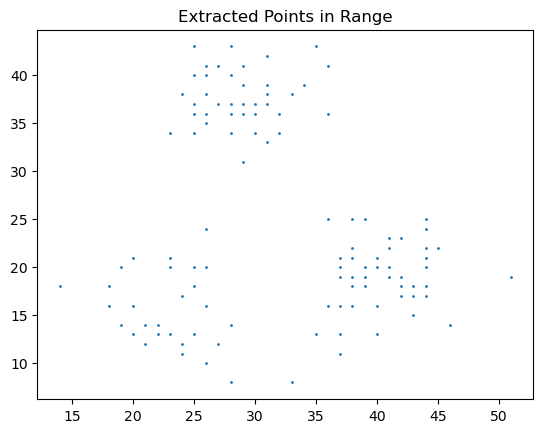

In [37]:
start_value = 200
end_value = 255

# Find the indices where the values lie within the specified range
indices = np.where((gray_array >= start_value) & (gray_array <= end_value))
xpoints, ypoints = indices
xpoints=height-xpoints
white = np.column_stack((ypoints, xpoints))
plt.scatter(white[:, 0], white[:, 1], s=1)
print(white)

plt.title("Extracted Points in Range")
plt.show()




# *K-Means* Clustering functions:

1.__init__: <br>
2.__fit_predict__: This function assigns clusters to the data points until wcss is minimum<br>
3.__assign_clusters__:This function assigns centroid to the data point/or we canm say assign clusters<br>
4.__move_centroids__:This function takes the mean of all the data points assigned to a given cluster and gives new centroid as  output of cluster of given index.<br>
5.__get_centroids__:This function gives list of all centroids with minimum wcss.

   

In [38]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=250, random_state=None):
        #creating variable self variables are unique to each instance of class
        self.n_clusters=n_clusters #sets the number of clusters
        self.max_iter=max_iter #sets the max number of iterations
        self.centroids=None #Initialize centroids as none
        
        if random_state:
            random.seed(random_state)
    
    def fit_predict(self,X):
       #randomly initializes the centroids
       random_index= random.sample(range(0,X.shape[0]),self.n_clusters)
       self.centroids=X[random_index]
    
       for _ in range(self.max_iter):#runs until max number of iterations
        #assign clusters
           cluster_group =self.assign_clusters(X)
           old_centroids=self.centroids
        #move centroids
           self.centroids=self.move_centroids(X,cluster_group)
        #check finish
           if np.all(old_centroids==self.centroids):
               break
           
       return cluster_group
           
    
    def assign_clusters(self,X):
        #calculates the euclidean distance between data point and centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        #find the  from index of closest centroid for each data point
        cluster_group = np.argmin(distances, axis=1)
        #returns the index of closest centroid
        return cluster_group
        
    
    def move_centroids(self,X,cluster_group):
       #list to store new centroids then it is converted to numpy array
        new_centroids = np.array([X[cluster_group == i].mean(axis=0) if len(X[cluster_group == i]) > 0 else self.centroids[i] for i in range(self.n_clusters)])
        return new_centroids
    
    def get_centroids(self):
        return self.centroids

## Elbow Method from scratch
Basic Idea:<br>
1.Define a range of value of k(No. of clusters).<br>
2.Store the WCSS value for each value of k.(By using Kmeans use the centroids self.centroids and calculate_wcss)<br>
3.Plot wcss vs k curve
4.For the value of k where change in value of slope is max it gives us the elbow point.


*Functions Used*: <br>
1.Calculate_wcss: calculate sum of square distance between cluster points and centroid(using calculates usng kmeans)<br>
2.Elbow_method: plots the elbow method plot between wcss and k which is used to identify optimal numnber of clusters<br>
3.Euclidean_distance:Used to calculate distance between data point and centroids
4.find_optimal_k:Calculates difference in wcss and returs k where this difference is maximum
5.inertia:returns the value of distance between data point and closest centroid{that is centroid of cluster which the point belongs}



In [39]:
#Calculating WCSS

 #elbow method

def calculate_wcss(X, centroids, labels):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

def elbow_method(X,max_clusters=10,random_state=None):
    wcss_value = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i,random_state=42)#setting the random state to a constant value ensures that same centroids are used for each value of k for consistency of the results
       #returns cluster_group for each k
        labels = kmeans.fit_predict(X)
        wcss = calculate_wcss(X, kmeans.centroids, labels)
        wcss_value.append(wcss)
        print(f"For k={i}, WCSS={wcss}")


    plt.plot(range(1,max_clusters+1),wcss_value,'bx-')#bx- means blue colour markers are connected by line-
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()  
    return wcss_value

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
 

def find_optimal_k(wcss_values):
    deltas = np.diff(wcss_values)  #correspond to first derivative
    second_deltas = np.diff(deltas)#correspond to second derivative
    print("Deltas:", deltas)
    print("Second Deltas:", second_deltas)
    optimal_k = np.argmax(second_deltas) + 2
    return optimal_k
   
def inertia(X, centroids):
    inertia_value = 0
    for x in X:
        closest_centroid = np.argmin([euclidean_distance(x, centroid) for centroid in centroids])
        inertia_value += euclidean_distance(x, centroids[closest_centroid]) ** 2
    return inertia_value


      

*To check manually the elbow point following wcss values are printed*

For k=1, WCSS=18932.955357142855
For k=2, WCSS=8181.4949069195645
For k=3, WCSS=2623.0370548991236
For k=4, WCSS=2359.0219350551997
For k=5, WCSS=2204.9694266939955
For k=6, WCSS=2081.543576155645
For k=7, WCSS=2046.5859865230552
For k=8, WCSS=2014.1224361845047
For k=9, WCSS=1990.0710292580977
For k=10, WCSS=1699.5823593073587


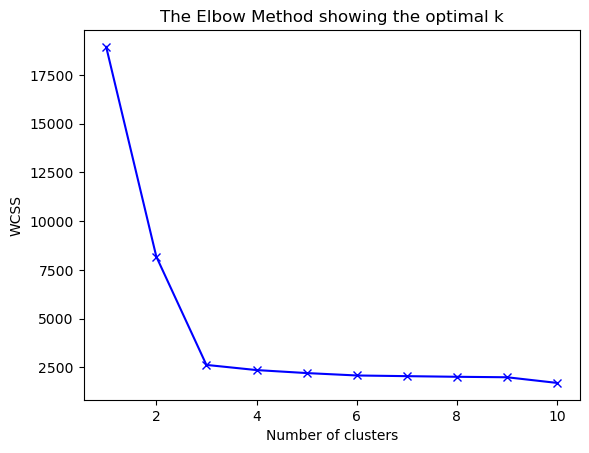

Deltas: [-10751.46045022  -5558.45785202   -264.01511984   -154.05250836
   -123.42585054    -34.95758963    -32.46355034    -24.05140693
   -290.48866995]
Second Deltas: [ 5.19300260e+03  5.29444273e+03  1.09962611e+02  3.06266578e+01
  8.84682609e+01  2.49403929e+00  8.41214341e+00 -2.66437263e+02]
Optimal number of clusters: 3


In [40]:
#plotting the elbow curve
wcss_values =elbow_method(white,max_clusters=10,random_state=42)
optimal_k = find_optimal_k(wcss_values)
print("Optimal number of clusters:", optimal_k)

Plotting the result obtained by elbow curve.

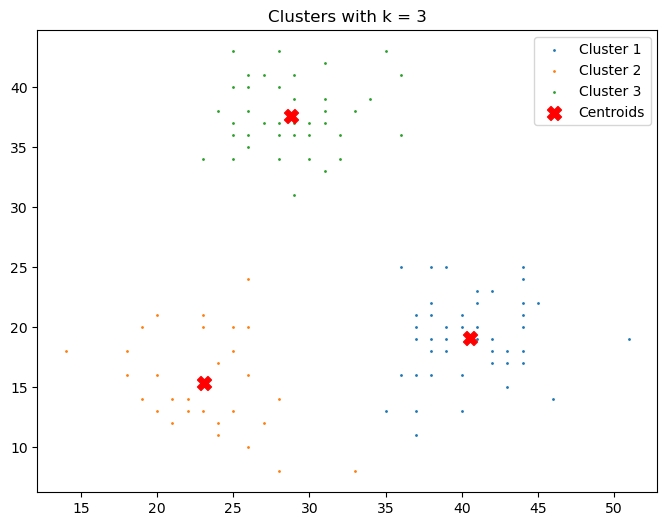

In [41]:
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
clusters = kmeans.fit_predict(white)
centroids = kmeans.get_centroids()


plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_points = white[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=1, label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red',label='Centroids', marker='X')
plt.title(f"Clusters with k = {optimal_k}")
plt.legend()
plt.show()

# Silhouette Score
It is computationally expensive hence not feasible for large data sets,useful in cases where elbow point is not clear.<br>
Basic Idea behind *Silhouette Score Analyis* :-<br>
<br>
Calculations:-<br>
<br>
Two distacne *a* and *b* are calculated for each data points as follows:-<br>
*a*(intra cluster distance)=average distance between data point and all other points in cluster.<br>
*b*(inter cluster distance)=Distance between data point and nearest cluster.<br>
<br>
*Silhouette Score*=(b-a)/max(a,b) this range from [-1,1].<br>
1 Signifies data points which are close within cluster.(*Good CLuster*)<br>
0 Signifies data points within border of clusters.(*Average Clusters*)<br>
-1 Signifies data points assigned to wrong clusters (*Poor Clustering*)<br>

Logic to find optimal number of cluster:<br>
The value of k is chosen for which average silhouette score is maximum.<br>

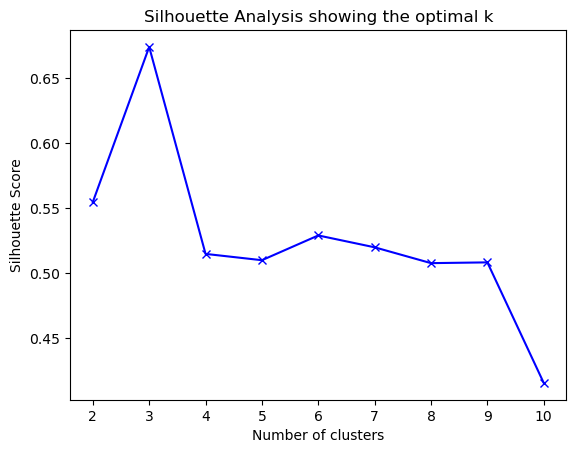

Optimal number of clusters using Silhouette Score (Manual): 3


In [42]:
#Function to Calculate Silhouette score
def silhouette_score_manual(X, labels):
    n = len(X)
    cluster_labels = np.unique(labels)
    silhouette_vals = []

    for i in range(n):
        a = np.mean([np.linalg.norm(X[i] - X[j]) for j in range(n) if labels[j] == labels[i] and j != i])
        b_vals = [np.mean([np.linalg.norm(X[i] - X[j]) for j in range(n) if labels[j] == k and k != labels[i]]) for k in cluster_labels if k != labels[i]]
        b = min(b_vals) if len(b_vals) > 0 else 0
        silhouette_vals.append((b - a) / max(a, b))

    return np.mean(silhouette_vals)


#Functional to calculate optimal_k and plot curve for silhouette score
def silhouette_analysis_manual(X, max_clusters=10, n_init=10, random_state=None):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        silhouette_scores_i = []
        for _ in range(n_init):
            kmeans = KMeans(n_clusters=i, random_state=random_state)
            labels = kmeans.fit_predict(X)
            silhouette_scores_i.append(silhouette_score_manual(X, labels))
        silhouette_scores.append(np.mean(silhouette_scores_i))

    plt.plot(range(2, max_clusters + 1), silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis showing the optimal k')
    plt.show()
    return silhouette_scores

# Perform silhouette analysis
silhouette_scores_manual = silhouette_analysis_manual(white, max_clusters=10, n_init=10, random_state=42)

# Find optimal number of clusters using silhouette score
optimal_k_s = np.argmax(silhouette_scores_manual) + 2
print("Optimal number of clusters using Silhouette Score (Manual):", optimal_k_s)


Perform Silhouette score analyis on our data and plotting the clusters

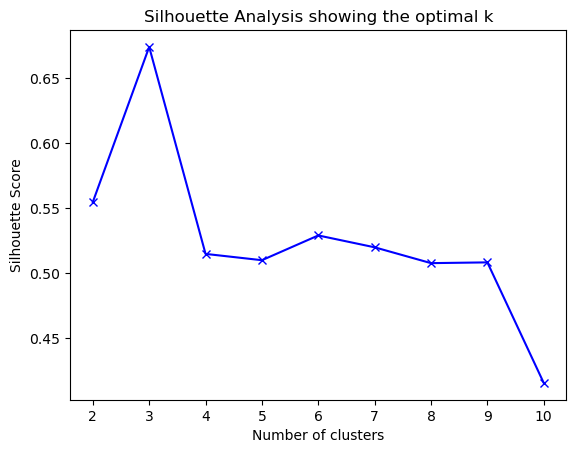

Optimal number of clusters using Silhouette Score (Manual): 3
[[40.54545455 19.09090909]
 [23.10344828 15.37931034]
 [28.82051282 37.61538462]]


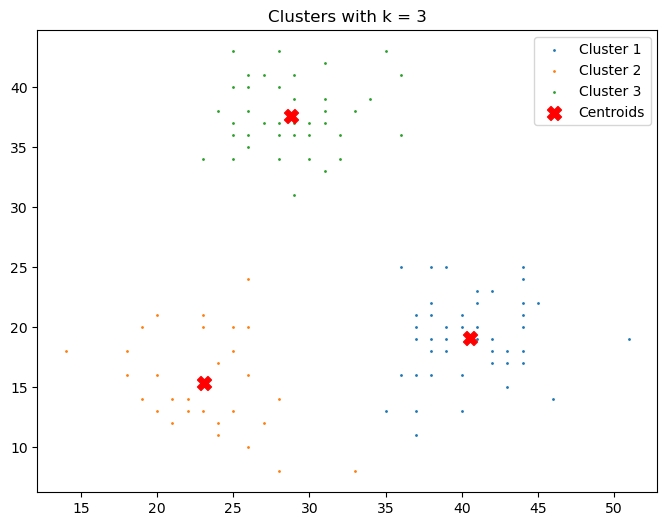

In [43]:
# Perform silhouette analysis
silhouette_scores_manual = silhouette_analysis_manual(white, max_clusters=10, n_init=10, random_state=42)

# Find optimal number of clusters using silhouette score
optimal_k_s = np.argmax(silhouette_scores_manual) + 2
print("Optimal number of clusters using Silhouette Score (Manual):", optimal_k_s)



kmeans = KMeans(n_clusters=optimal_k_s,random_state=42)
clusters = kmeans.fit_predict(white)
centroids = kmeans.get_centroids()
print(centroids)


plt.figure(figsize=(8, 6))
for i in range(optimal_k_s):
    cluster_points = white[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=1, label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red',label='Centroids', marker='X')
plt.title(f"Clusters with k = {optimal_k_s}")
plt.legend()
plt.show()

*Function to calculate distance between centroids and plotting them into tables*

In [44]:
centroids = kmeans.get_centroids()
def calculate_distance_matrix(X):
    n = X.shape[0]
    distance_matrix=[]
    
    for i in range(n):
        for j in range (i+1,n):
            distance=euclidean_distance(X[i],X[j])
            distance_matrix.append([f'Cluster {i+1} and Cluster {j+1}', distance])


    return distance_matrix

distance_matrix = calculate_distance_matrix(centroids)
for entry in distance_matrix:
    print(f'{entry[0]}: {entry[1]}')

Cluster 1 and Cluster 2: 17.83254182556197
Cluster 1 and Cluster 3: 21.923285609373703
Cluster 2 and Cluster 3: 22.959264491124948
